In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd

[![Build Status](https://travis-ci.org/matplotlib/mplfinance.svg?branch=master)](https://travis-ci.org/matplotlib/mplfinance)

# mplfinance
## matplotlib utilities for the visualization, and visual analysis, of financial data

---

# Installation
## &nbsp;&nbsp;&nbsp;`pip install --upgrade mplfinance`
   - mplfinance requires [matplotlib](https://pypi.org/project/matplotlib/) and [pandas](https://pypi.org/project/pandas/)

---

# Contents

  - **[The New API](https://github.com/matplotlib/mplfinance#newapi)**
  - **[Basic Usage](https://github.com/matplotlib/mplfinance#usage)**
  - **[Adding Your Own Technical Studies to Plots](https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb)**
  - **[Saving the Plot to a File](https://github.com/matplotlib/mplfinance/blob/master/examples/savefig.ipynb)**
  - **[Customizing the Appearance of Plots](https://github.com/matplotlib/mplfinance/blob/master/examples/customization_and_styles.ipynb)**
  - Technical Studies (presently in development)
  - **[Latest Release Info](https://github.com/matplotlib/mplfinance#release)**
  - **[Some Background History About This Package](https://github.com/matplotlib/mplfinance#history)**
  - **[Old API Availability](https://github.com/matplotlib/mplfinance#oldapi)**

---
## <a name="newapi"></a>The New API

This repository, `matplotlib/mplfinance`, contains a new **matplotlib finance** API that makes it easier to create financial plots.  It interfaces nicely with **Pandas** DataFrames.  

*More importantly, **the new API automatically does the extra matplotlib work that the user previously had to do "manually" with the old API.***   (The old API is still available within this package; see below).

The conventional way to import the new API is as follows:

```python
    import mplfinance as mpf
```

The most common usage is then to call

```python
    mpf.plot(data)
```

where `data` is a `Pandas DataFrame` object containing Open, High, Low and Close data, with a Pandas `DatetimeIndex`.

Details on how to call the new API can be found below under **[Basic Usage](https://github.com/matplotlib/mplfinance#usage)**, as well as in the jupyter notebooks in the **[examples](https://github.com/matplotlib/mplfinance/blob/master/examples/)** folder.

I am very interested to hear from you regarding what you think of the new `mplfinance`, plus any suggestions you may have for improvement.  You can reach me at **dgoldfarb.github@gmail.com**  or, if you prefer, provide feedback or a ask question on our **[issues page.](https://github.com/matplotlib/mplfinance/issues/new/choose)**

---

# <a name="usage"></a>Basic Usage
Start with a Pandas DataFrame containing OHLC data.  For example,

In [2]:
import pandas as pd
daily = pd.read_csv('examples/data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878
2019-11-05,3080.80,3083.95,3072.15,3074.62,585634570


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-26,3134.85,3142.69,3131.00,3140.52,986041660
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


---
<br>

After importing mplfinance, plotting OHLC data is as simple as calling `mpf.plot()` on the dataframe

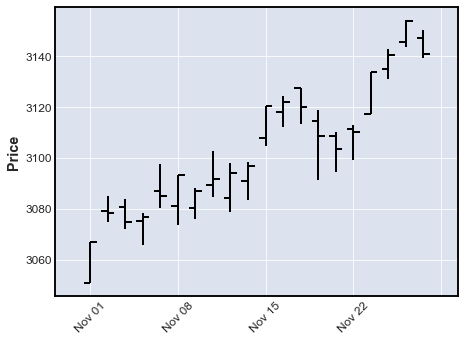

In [3]:
import mplfinance as mpf
mpf.plot(daily)

---
<br>

The default plot type, as you can see above, is `'ohlc'`.  Other plot types can be specified with the keyword argument `type`, for example, `type='candle'`, `type='line'`, or `type='renko'`

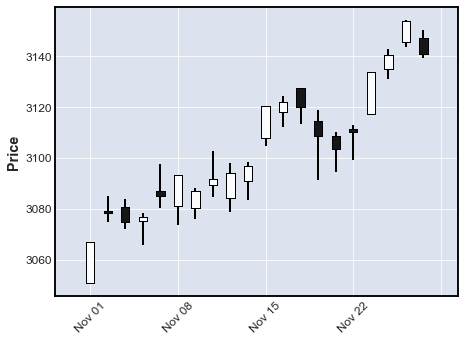

In [4]:
mpf.plot(daily,type='candle')

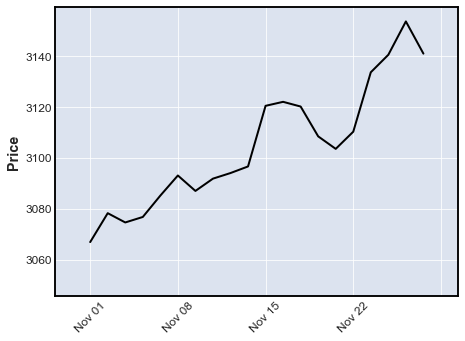

In [5]:
mpf.plot(daily,type='line')

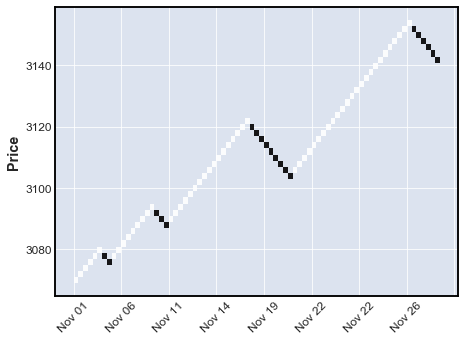

In [6]:
mpf.plot(daily, type='renko')

---
<br>

We can also plot moving averages with the `mav` keyword
- use a scalar for a single moving average 
- use a tuple or list of integers for multiple moving averages

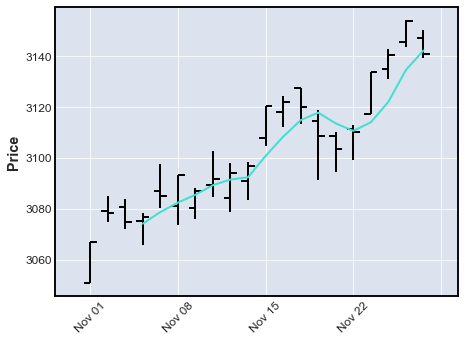

In [7]:
mpf.plot(daily,type='ohlc',mav=4)

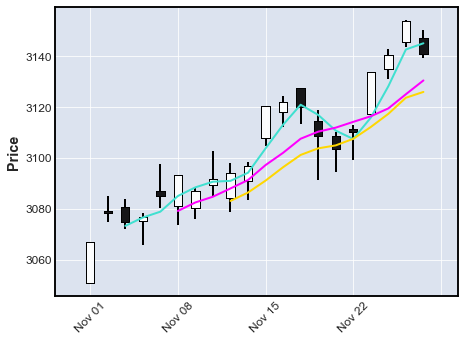

In [8]:
mpf.plot(daily,type='candle',mav=(3,6,9))

---
We can also display `Volume`

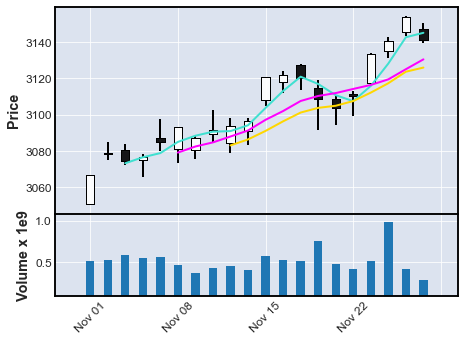

In [9]:
mpf.plot(daily,type='candle',mav=(3,6,9),volume=True)

Notice, in the above chart, there are no gaps along the x-coordinate, even though there are days on which there was no trading.  Non-trading days are simply not shown (if there are no prices for those days).

- However, sometimes people like to see these gaps, so that they can tell, with a quick glance, where the weekends and holidays fall.  

- Non-trading days can be displayed with the `show_nontrading` keyword.
- For example, in the chart below, you can easily see weekends, as well as a gap at Thursday, November 28th for the U.S. Thanksgiving holiday.

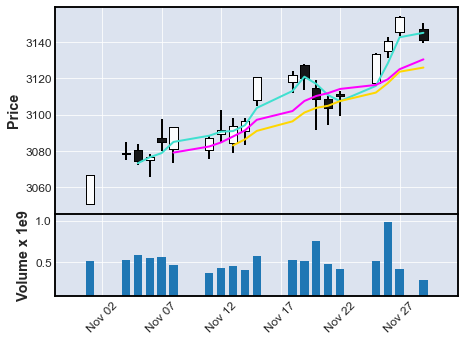

In [10]:
mpf.plot(daily,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

---

We can also plot intraday data:

In [11]:
intraday = pd.read_csv('examples/data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
intraday.head(3)
intraday.tail(3)

(1563, 4)

,Open,Close,High,Low
Date,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43


,Open,Close,High,Low
Date,,,,
2019-11-08 15:57:00,3090.73,3090.70,3091.02,3090.52
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96




The above dataframe contains Open,High,Low,Close data at 1 minute intervervals for the S&P 500 stock index for November 5, 6, 7 and 8, 2019.  Let's look at the last hour of trading on November 6th, with a 7 minute and 12 minute moving average.

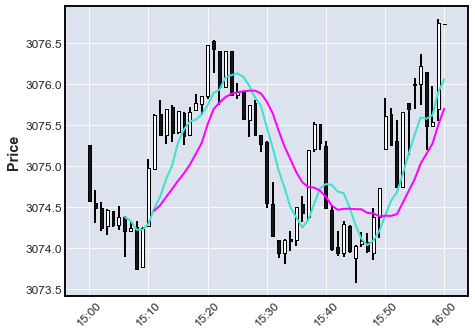

In [12]:
iday = intraday.loc['2019-11-06 15:00':'2019-11-06 16:00',:]
mpf.plot(iday,type='candle',mav=(7,12))

  The "time-interpretation" of the `mav` integers depends on the frequency of the data, because the mav integers are number of data points used in the Moving Average.  Notice above that for intraday data the x-axis automatically displays TIME *instead of* date.  Below we see that if the intraday data spans into two (or more) trading days the x-axis automatically displays *BOTH* TIME and DATE

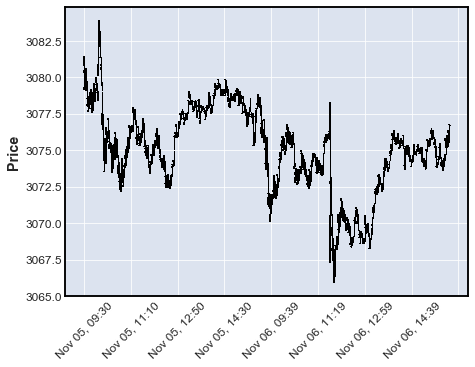

In [13]:
iday = intraday.loc['2019-11-05':'2019-11-06',:]
mpf.plot(iday,type='candle')

---
In the plot below, we see what an intraday plot looks like when we **display non-trading time periods** with **`show_nontrading=True`** for intraday data spanning into two or more days.

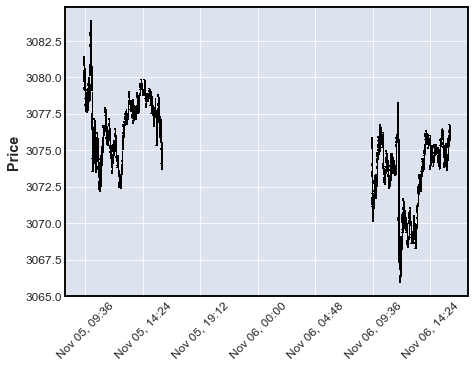

In [14]:
mpf.plot(iday,type='candle',show_nontrading=True)

---
Below: 4 days of intraday data with `show_nontrading=True`

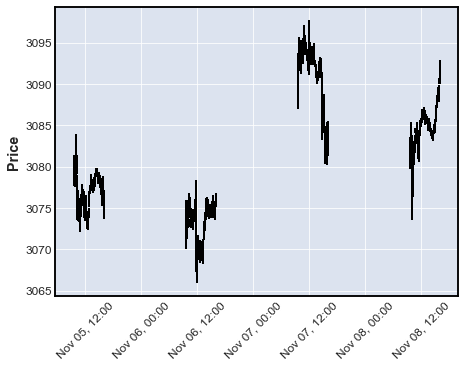

In [15]:
mpf.plot(intraday,type='ohlc',show_nontrading=True)

---
Below: the same 4 days of intraday data with `show_nontrading` defaulted to `False`.

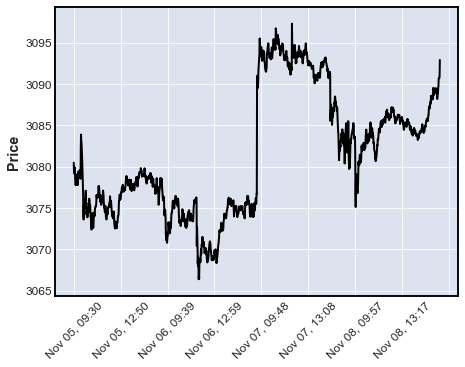

In [16]:
mpf.plot(intraday,type='line') 

---
Below: Daily data spanning across a year boundary automatically adds the *YEAR* to the DATE format

In [17]:
df = pd.read_csv('examples/data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(2519, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,147.100006,147.610001,146.059998,146.210007,118.624741,108126800
2008-01-02,146.529999,146.990005,143.880005,144.929993,117.586205,204935600
2008-01-03,144.910004,145.490005,144.070007,144.860001,117.529449,125133300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-27,267.380005,267.730011,267.010010,267.320007,267.320007,57751000
2017-12-28,267.890015,267.920013,267.450012,267.869995,267.869995,45116100
2017-12-29,268.529999,268.549988,266.640015,266.859985,266.859985,96007400


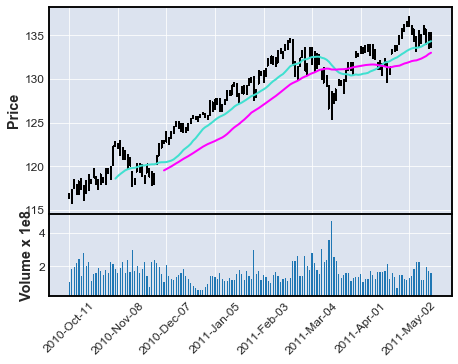

In [18]:
mpf.plot(df[700:850],type='bars',volume=True,mav=(20,40))

For more examples of using mplfinance, please see the jupyter notebooks in the **[`examples`](https://github.com/matplotlib/mplfinance/blob/master/examples/)** directory.

---
 
# <a name="release"></a>Release Notes

| Version  |  Description   | Release Date |
|:---------|:-------------|:---------------|
| 0.12.3a0   | - kwarg `block=False` for non-blocking call to `mpf.plot()`<br> - customize aspect ratio, figure title, y-labels<br> - customize colors and other `style` aspects of plot<br> - `no_xgaps` now defaults to True: use `show_nontrading=True` to set no_xgaps to false<br> - secondary y-axis available to `make_addplot()`<br> - bug fix for volume widths | 2020-02-11 |
| 0.12.0a3   | Increase mav limit from 3 to 7 different mavs  | 2020-01-16 |
| 0.12.0a2   | Ability to save plot to a file (pdf, svg, png, jpg, ...) | 2020-01-14 |
| 0.12.0a1   | Ability to plot arbitrary user data (in addition to basic OHLCV data).<br> - both line and scatter plots available.<br> - optionally plot on either the "main" or "lower" (aka "volume") axis. | 2020-01-09 |
| 0.11.x   | Basic Plotting from Pandas DataFrame of OHLC bars and candlesticks.<br> - optional display of volume<br> - optional display of (up to 3 different) moving averages.<br> - old API still available by importing from "mplfinance/original_flavor" | 2019-12-20  |
| 0.10.x   | Old mpl-finance API set up as its own package<br> (i.e. removed from the matplotlib package). | 2016-09-08   |

---

## <a name="history"></a>Some History
My name is Daniel Goldfarb.  In November 2019, I became the maintainer of `matplotlib/mpl-finance`.  That module is being deprecated in favor of the current `matplotlib/mplfinance`.  The old `mpl-finance` consisted of code extracted from the deprecated `matplotlib.finance` module along with a few examples of usage.  It has been mostly un-maintained for the past three years.  

It is my intention to archive the `matplotlib/mpl-finance` repository soon, and direct everyone to `matplotlib/mplfinance`.  The main reason for the rename is to avoid confusion with the hyphen and the underscore: As it was, `mpl-finance` was *installed with the hyphen, but imported with an underscore `mpl_finance`.*  Going forward it will be a simple matter of both installing and importing `mplfinance`.

---
### <a name="oldapi"></a>old API availability

With this new ` mplfinance ` package installed, in addition to the new API, users can still access the old API (at least for the next several months) by changing their import statments<br>
**from:**

```python
    from mpl_finance import <method>
```

**to:**

```python
    from mplfinance.original_flavor import <method>
```


where `<method>` indicates the method you want to import, for example:



```python
    from mplfinance.original_flavor import candlestick_ohlc
```

---